# NLP Movie Guide

### I'm learning NLP! This will be a notebook to track my progress and ideas as I learn more about the subject

In [34]:
# this can reset all of our overrides for pandas
pd.reset_option('all')

# set the number of characters we can use for display on Pandas.. applies to the whole file
# pd.set_option('display.max_rows', 400)
# pd.set_option('display.max_columns', 400)
# pd.set_option('display.width', 100)
# pd.set_option('display.max_colwidth', 400)

/var/folders/yc/gpggg28n7nn_w621sqzf_kl00000gn/T/ipykernel_38580/908419270.py:2: FutureWarning: column_space is deprecated and will be removed in a future version. Use df.to_string(col_space=...) instead.
  pd.reset_option('all')
/var/folders/yc/gpggg28n7nn_w621sqzf_kl00000gn/T/ipykernel_38580/908419270.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  pd.reset_option('all')
/var/folders/yc/gpggg28n7nn_w621sqzf_kl00000gn/T/ipykernel_38580/908419270.py:2: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  pd.reset_option('all')


In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../Kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../Kaggle/input/.DS_Store
../Kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv
../Kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv


In [36]:
df = pd.read_csv('../Kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [37]:
print(f'Shape of the File : {df.shape}\n')
print(f'All the Columns of the Dataframe : \n\n{df.columns.values}')

Shape of the File : (4803, 20)

All the Columns of the Dataframe : 

['budget' 'genres' 'homepage' 'id' 'keywords' 'original_language'
 'original_title' 'overview' 'popularity' 'production_companies'
 'production_countries' 'release_date' 'revenue' 'runtime'
 'spoken_languages' 'status' 'tagline' 'title' 'vote_average' 'vote_count']


In [38]:
# print the first five genres in the movie set
# for i in range(5):
#     print(df['genres'][i])
df['genres'].head(5)

# here we can see that movies have multiple genres

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [40]:
import json 
df_genres = df['genres']


print('Type of the data in the column genres : \n',df_genres[0],'\n','Class: ',type(df_genres[0]))

Type of the data in the column genres : 
 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}] 
 Class:  <class 'str'>


### says the type is Class: <class 'str'>, but it looks to be a list of objects that have an id and name


In [67]:
# something like this... but python doesn't need classes like this, we can just hold a dictionary of attributes
class Genre:
    def __init__(self, id, name):
        self.id = id
        self.name = name
    def __repr__(self):
        return f"Genre(id='{self.id}', name='{self.name}')"

In [68]:
g = Genre(12, "action")
print(g)

Genre(id='12', name='action')


In [69]:
d = {str(i): "" for i in range(5)}
print(type(d))

<class 'dict'>


In [75]:
import json 
df_genres = df['genres']

print('Type of the data in the column genres : \n',df_genres[0],'\n','Class: ',type(df_genres[0]))
print('\n By Visual Inspection it seems to be dict in list : str([{},{}..])')
print('We can use normal json.loads on the genre to convert it to : --> json.loads(str[{},{}..])--> [{},{}..]')

df_genres = df_genres.apply(json.loads)

print('\nNow,The Type has been converted :', type(df_genres[0]))



Type of the data in the column genres : 
 [{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}] 
 Class:  <class 'str'>

 By Visual Inspection it seems to be dict in list : str([{},{}..])
We can use normal json.loads on the genre to convert it to : --> json.loads(str[{},{}..])--> [{},{}..]

Now,The Type has been converted : <class 'list'>


In [93]:
print(df_genres[0])
# c = [genre['name'] for genre in df_genres[0]]
# print(c)
df_genres = [[genre['name'] for genre in row] for row in df_genres]
# this is a list of all the genres per row in df_genres

[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]


In [94]:
# transform this data from a list to a pandas series
df_genres = pd.Series(df_genres,name = 'genre')
df_genres.head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genre, dtype: object

In [118]:
# this returns all of the movies with only one genre
df_genre = df_genres.loc[df_genres.apply(len)==1]
df_genre = df_genre.apply(lambda x: ''.join(map(str, x)))

In [119]:
df_genre

44               Action
64      Science Fiction
105             Fantasy
132           Adventure
155              Comedy
             ...       
4789              Drama
4791             Horror
4793              Drama
4795              Drama
4802        Documentary
Name: genre, Length: 900, dtype: object

In [120]:
# setting up the dataframe a little more
df['release_date'] = pd.to_datetime(df['release_date'])
df['genre_one'] = df_genre
df['year'] = pd.to_datetime(df['release_date']).dt.year

In [131]:
# Get all of the DF columns where we have an actual genre_one column
df[df['genre_one'].notna()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_one,year
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176,Action,2015.0
64,178000000,"[{""id"": 878, ""name"": ""Science Fiction""}]",http://www.foxmovies.com/movies/x-men-apocalypse,246655,"[{""id"": 1852, ""name"": ""mutant""}, {""id"": 4769, ...",en,X-Men: Apocalypse,After the re-emergence of the world's first mu...,139.272042,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,543934787,144.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the strong will survive,X-Men: Apocalypse,6.4,4721,Science Fiction,2016.0
105,170000000,"[{""id"": 14, ""name"": ""Fantasy""}]",http://movies.disney.com/alice-through-the-loo...,241259,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Alice Through the Looking Glass,"In the sequel to Tim Burton's ""Alice in Wonder...",56.268916,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,299370084,113.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It's time for a little madness.,Alice Through the Looking Glass,6.5,1725,Fantasy,2016.0
132,150000000,"[{""id"": 12, ""name"": ""Adventure""}]",http://www.wrathofthetitansmovie.org,57165,"[{""id"": 1449, ""name"": ""underworld""}, {""id"": 20...",en,Wrath of the Titans,A decade after his heroic defeat of the monstr...,44.927635,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,301000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Feel the Wrath,Wrath of the Titans,5.5,1431,Adventure,2012.0
155,100000000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.sonypictures.com/movies/funwithdick...,7552,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,Fun with Dick and Jane,After Dick Harper loses his job at Globodyne i...,25.159168,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...",...,202026112,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Giving big businesses a run for their money!,Fun with Dick and Jane,5.9,627,Comedy,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,39851,"[{""id"": 6782, ""name"": ""addiction""}, {""id"": 155...",en,Clean,"After losing her husband to a heroin overdose,...",1.464566,[],...,0,111.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,"When you don't have a choice, you change.",Clean,6.7,17,Drama,2004.0
4791,13,"[{""id"": 27, ""name"": ""Horror""}]",http://tincanmanthemovie.com/,157185,"[{""id"": 14903, ""name"": ""home invasion""}]",en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,"[{""name"": ""Park Films"", ""id"": 21871}, {""name"":...",...,0,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Everything You've Heard is True,Tin Can Man,2.0,1,Horror,2007.0
4793,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,182291,"[{""id"": 718, ""name"": ""confession""}, {""id"": 100...",en,On The Downlow,Isaac and Angel are two young Latinos involved...,0.029757,"[{""name"": ""Iconoclast Films"", ""id"": 26677}]",...,0,90.0,[],Released,Two gangs. One secret. One crossroad.,On The Downlow,6.0,2,Drama,2004.0
4795,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,124606,"[{""id"": 10726, ""name"": ""gang""}, {""id"": 33928, ...",en,Bang,A young woman in L.A. is having a bad day: she...,0.918116,"[{""name"": ""Asylum Films"", ""id"": 10571}, {""name...",...,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Sometimes

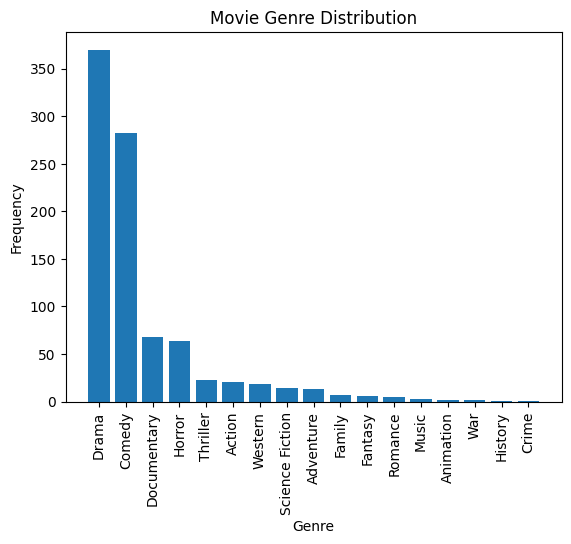

Drama              370
Comedy             282
Documentary         68
Horror              64
Thriller            23
Action              21
Western             18
Science Fiction     14
Adventure           13
Family               7
Fantasy              6
Romance              5
Music                3
Animation            2
War                  2
History              1
Crime                1
Name: genre, dtype: int64


In [132]:
import pandas as pd
import matplotlib.pyplot as plt

genre_counts = df_genre.value_counts()

plt.bar(genre_counts.index, genre_counts.values)
plt.title('Movie Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

print(df_genre.value_counts())

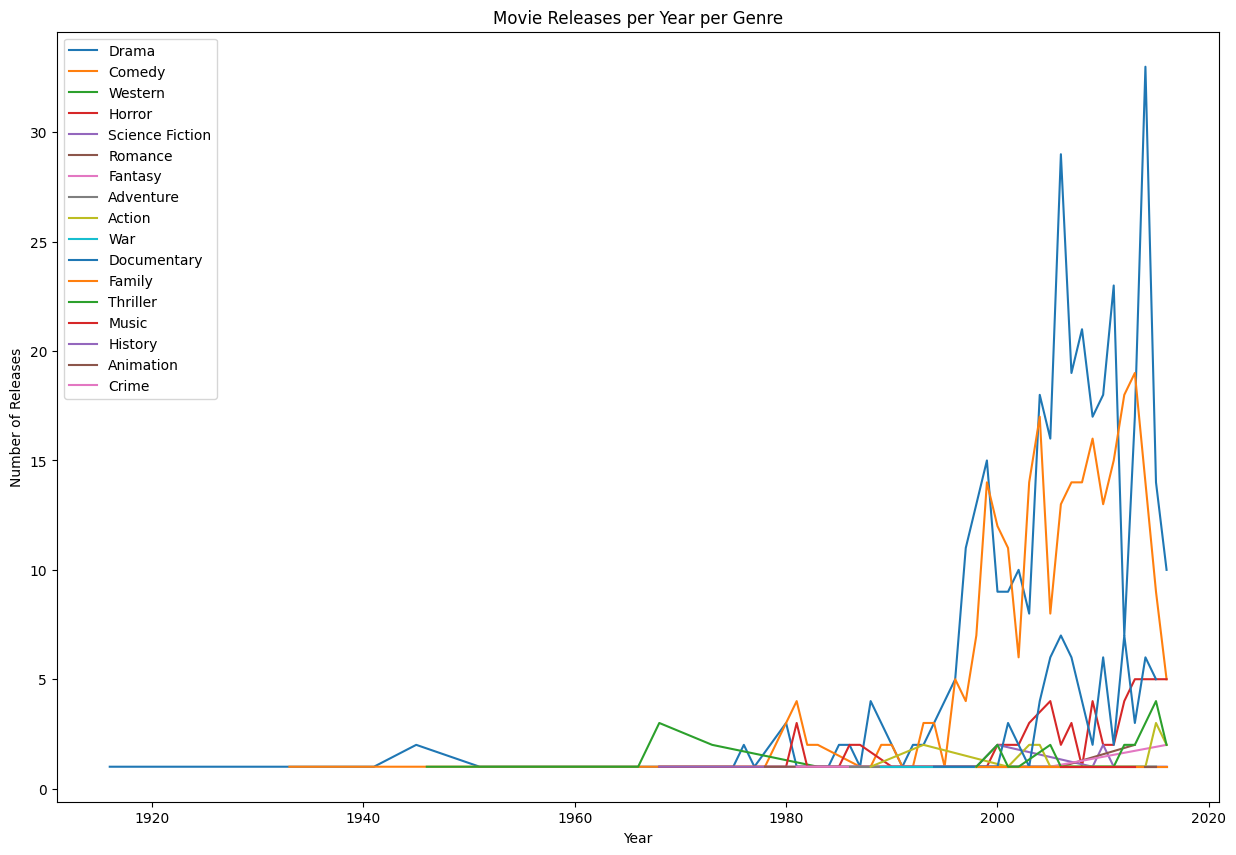

In [133]:
genre_year_counts = df.groupby(['year', 'genre_one']).size().reset_index(name='counts')

plt.figure(figsize=(15, 10))

for genre in genre_year_counts['genre_one'].unique():
    genre_data = genre_year_counts[genre_year_counts['genre_one'] == genre]
    plt.plot(genre_data['year'], genre_data['counts'], label=genre)

plt.title('Movie Releases per Year per Genre')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.legend()
plt.show()